In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
def policy_func(state, theta, standard_dv):
    mu = state*theta[0] + theta[1]
    action = random.gauss(mu, standard_dv)
    return action

def gradian_log_policy_func(state, theta, standard_dv, action):
    grad_log_pl = np.array([state*(action-(state*theta[0]+theta[1]))/(standard_dv**2), 
                            (action-(state*theta[0]+theta[1]))/(standard_dv**2)])
    return grad_log_pl

In [3]:
gradian_log_policy_func(4, np.array([0,1]), 1, 2)

array([4., 1.])

In [4]:
policy_func(4, [0, 1], 1)

0.6302142585868871

In [5]:
class Environment:
    def __init__(self):
        self.state = 5*random.random()
        
    def f(self, x):
        z = 1/(3+(x-1)*(x-1))
        
        if(x > 1.5):
            z = 1/(1+(x-3)*(x-3))
            
        return z    
    
    
    def action(self, action):
        self.reward = self.f(max(min(action + self.state, 5), -5))           
        self.state = max(min(action + self.state, 5), -5)
            
 
    

In [6]:
envi = Environment()

In [7]:
envi.state

0.04757626502069012

In [8]:
envi.action(1)

In [9]:
print(envi.state)
print(envi.reward)

1.0475762650206901
0.33308202283681737


In [10]:
class PolicyLearning:
    def __init__(self, env, std):
        self.theta = np.array([-1*np.random.random(), 2*np.random.random() - 1])
        self.env = env
        self.std = std   #Standard deviation of the policy function
        self.histr = []  #The value of total reward (V) over each itteration of the learning process
        
    def explore(self, n_ex , tmst):    #The "n_ex" is the number of exploration itterations, 
                                       #and the "tmst" is the duration of time horizon
        Rs = []                        #The "Rs" is list of all of the total rewards over itterations
        a_exp = []                     #List of all of the actions that the agent does over itterations
        s_exp = []                     #List of all of the states that the environment goes through over itterations
        
        for it in range(n_ex):
            self.env.state = 5*random.random()      #Initializing the state with a random value in the [0,5] interval
            R = 0                                   #The total reward of the agent given the policy                            
            states_exp_it = []                      #All states that the environment goes through in this itteration  
            action_exp_it = []                      #All actions that the agent does in this itteration
            
            for tm in range(tmst):
                states_exp_it.append(self.env.state)
                action = policy_func(self.env.state,self.theta,self.std)
                action_exp_it.append(action)
                self.env.action(action)
                R = R + self.env.reward
                
            Rs.append(R)
            a_exp.append(action_exp_it) 
            s_exp.append(states_exp_it)  
            
            
        return  Rs, a_exp, s_exp    
    
    def learn(self, n_ex, tmst, ittr,  w, descend_rate):
        #The "ittr" is the number of learning itterations.
        #The "w" is the initial coefficent of the gradian ascend in learning process.
        #The coefficent of gradian decrease with "descend_rate" after each learning itteration.
        
        for itt in range(ittr):
            c , a_exp , s_exp = self.explore(n_ex, tmst)
            theta0 = self.theta
            
            for ex in range(n_ex):
                for t in range(tmst):
                    self.theta = np.clip(self.theta + w*gradian_log_policy_func(s_exp[ex][t], 
                                                                               theta0, self.std, a_exp[ex][t])*c[ex]/n_ex, 
                                                                               [-1, -1], [0, 1])
                    #The prameter list "theta" changes after each itteration of the learning process
                    #The "theta[0]" is bounded in [-1,0] interval, and the "theta[1]" is bounded in [-1,1] interval
            self.histr.append(sum(c)/len(c))
            w = w*descend_rate
            
    def history(self):
        plt.plot(self.histr)
        

In [11]:
model = PolicyLearning(envi, 0.1)

In [12]:
model.explore(n_ex = 50 ,tmst = 30)

([15.712220630486556,
  17.52660085947688,
  15.231149518189662,
  17.002591693437697,
  16.617908170717527,
  18.157196453641305,
  18.422217020411896,
  15.829770058042342,
  15.392592884102308,
  16.432700517685085,
  17.39105433757847,
  17.03858182386239,
  16.300799704867146,
  16.253845766482982,
  17.281873975956344,
  17.286279251014268,
  18.964444370016558,
  16.86836076424388,
  17.231351487106895,
  17.49951270489633,
  16.72255890332701,
  15.970422494092903,
  16.744133456911715,
  17.13071202641234,
  15.7402727691857,
  17.953231819930892,
  16.666253005487388,
  16.26121933071306,
  17.52135342867941,
  15.459400580207532,
  17.618602547987972,
  16.96304740312929,
  17.268926450402564,
  17.401241294866775,
  18.062205162936216,
  15.182127184729127,
  15.000431193200878,
  17.099945656361466,
  17.10925591334797,
  15.584077001046174,
  18.088027155759114,
  15.478802709028757,
  17.553059635751698,
  15.315318160506383,
  16.51667728282662,
  18.20716859248857,
  1

In [13]:
model.learn(n_ex = 100, tmst = 50, ittr = 3000, w = 0.00005, descend_rate = 0.997)

In [14]:
model.theta

array([-0.32986692,  0.99318946])

In [15]:
envi.state

3.0842457356215336

In [16]:
envi.reward

0.9929526733310282

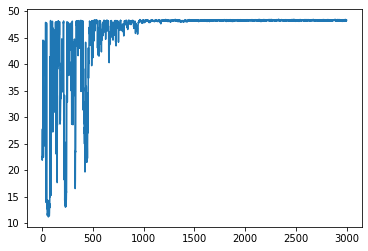

In [18]:
model.history()

In [20]:
model.explore(n_ex = 5, tmst = 30)

([27.70171984060554,
  29.27151870347665,
  27.97326491821782,
  28.29758735139556,
  27.35383796215415],
 [[0.873552200774833,
   0.7975340701465903,
   0.2711497412522585,
   0.3414626265723226,
   0.26965124440034094,
   0.10078004133300529,
   0.18420121223316882,
   -0.10152706538189929,
   0.07781409229137229,
   0.05108901142292527,
   -0.016566947058341455,
   -0.16111552373014007,
   0.051085713151401174,
   -0.034194517450333514,
   0.13236963632192814,
   0.061277420938715514,
   0.03627437469270546,
   0.016020657314285425,
   -0.17366376375480028,
   0.06401463286393311,
   -0.03966202978894887,
   0.21699293115842336,
   0.018245461573348512,
   0.05367576263031866,
   -0.11819770517563385,
   -0.10391205156861788,
   0.12092390171149214,
   -0.15452214547847726,
   -0.025084220943324617,
   0.14746626413116776],
  [0.23650948142652917,
   -0.18562065250173163,
   -0.16313991041987888,
   -0.1386058306353916,
   0.17416643775225463,
   -0.19443070505067556,
   0.031728435

In [21]:
states = np.linspace(-5, 5, 200)
mu = states*model.theta[0] + model.theta[1]

Text(0, 0.5, 'mu(state,theta)')

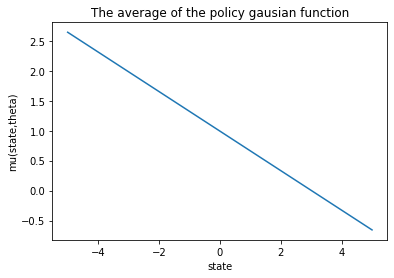

In [22]:
plt.plot(states, mu)
plt.title("The average of the policy gausian function")
plt.xlabel("state")
plt.ylabel("mu(state,theta)")